In [33]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from matplotlib.lines import Line2D
import matplotlib

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

#drug_data.head()
#clinical_trial_data.head()

# Combine the data into a single dataset
pharma_data_complete = pd.merge(drug_data, clinical_trial_data, how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
pharma_data_complete.head()
#pharma_data_complete.dtypes
#pharma_data_complete.columns
#pharma_data_complete.count()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint

clean_drugs_df = pharma_data_complete[(pharma_data_complete["Drug"] == 'Capomulin') |
                      (pharma_data_complete["Drug"] == 'Infubinol') |
                      (pharma_data_complete["Drug"] == 'Ketapril') |
                      (pharma_data_complete["Drug"] == 'Placebo')
                     ]

clean_drugs_df.head()

# Convert to DataFrame
# Preview DataFrame

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
380,q119,Ketapril,0,45.000000,0
381,q119,Ketapril,5,47.864440,0
382,q119,Ketapril,10,51.236606,0
383,n923,Ketapril,0,45.000000,0
384,n923,Ketapril,5,45.824881,0


In [3]:
tumor_response = clean_drugs_df.groupby(['Drug','Timepoint'])
tumor_response_mean = pd.DataFrame(tumor_response["Tumor Volume (mm3)"].mean())
tumor_response_mean.reset_index(inplace=True)
tumor_response_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame

tumor_response_sem = pd.DataFrame(tumor_response["Tumor Volume (mm3)"].sem())
#tumor_response_sem.reset_index(inplace=True)
tumor_response_sem.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [5]:
Capomulin_sem = tumor_response_sem.loc["Capomulin",["Tumor Volume (mm3)"]]
Capomulin_sem = Capomulin_sem.iloc[:, 0].values
#Capomulin_sem

Infubinol_sem = tumor_response_sem.loc["Infubinol",["Tumor Volume (mm3)"]]
Infubinol_sem = Infubinol_sem.iloc[:, 0].values
#Infubinol_sem

Ketapril_sem = tumor_response_sem.loc["Ketapril",["Tumor Volume (mm3)"]]
Ketapril_sem = Ketapril_sem.iloc[:, 0].values
#Ketapril_sem

Placebo_sem = tumor_response_sem.loc["Placebo",["Tumor Volume (mm3)"]]
Placebo_sem = Placebo_sem.iloc[:, 0].values
Placebo_sem

array([0.        , 0.21809078, 0.40206381, 0.61446144, 0.83960917,
       1.03487199, 1.21823118, 1.2874806 , 1.37063404, 1.3517256 ])

In [6]:
Capomulin = tumor_response_mean.loc[tumor_response_mean["Drug"]=="Capomulin",:]
Capomulin
Capomulin_renamed = Capomulin.rename(columns={"Tumor Volume (mm3)":"Capomulin"})
Capomulin_renamed.head()

,Drug,Timepoint,Capomulin
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [7]:
Infubinol = tumor_response_mean.loc[tumor_response_mean["Drug"]=="Infubinol",:]
Infubinol
Infubinol_renamed = Infubinol.rename(columns={"Tumor Volume (mm3)":"Infubinol"})
Infubinol_renamed.head()

,Drug,Timepoint,Infubinol
10,Infubinol,0,45.000000
11,Infubinol,5,47.062001
12,Infubinol,10,49.403909
13,Infubinol,15,51.296397
14,Infubinol,20,53.197691


In [8]:
Ketapril = tumor_response_mean.loc[tumor_response_mean["Drug"]=="Ketapril",:]
Ketapril
Ketapril_renamed = Ketapril.rename(columns={"Tumor Volume (mm3)":"Ketapril"})
Ketapril_renamed.head()

,Drug,Timepoint,Ketapril
20,Ketapril,0,45.000000
21,Ketapril,5,47.389175
22,Ketapril,10,49.582269
23,Ketapril,15,52.399974
24,Ketapril,20,54.920935


In [9]:
Placebo = tumor_response_mean.loc[tumor_response_mean["Drug"]=="Placebo",:]
Placebo
Placebo_renamed = Placebo.rename(columns={"Tumor Volume (mm3)":"Placebo"})
Placebo_renamed.head()

,Drug,Timepoint,Placebo
30,Placebo,0,45.000000
31,Placebo,5,47.125589
32,Placebo,10,49.423329
33,Placebo,15,51.359742
34,Placebo,20,54.364417


In [10]:
merge1 = pd.merge(Capomulin_renamed, Infubinol_renamed, on="Timepoint")
merge1.head()

,Drug_x,Timepoint,Capomulin,Drug_y,Infubinol
0,Capomulin,0,45.000000,Infubinol,45.000000
1,Capomulin,5,44.266086,Infubinol,47.062001
2,Capomulin,10,43.084291,Infubinol,49.403909
3,Capomulin,15,42.064317,Infubinol,51.296397
4,Capomulin,20,40.716325,Infubinol,53.197691


In [11]:
merge2 = pd.merge(Ketapril_renamed, Placebo_renamed, on = "Timepoint")
merge2.head()

,Drug_x,Timepoint,Ketapril,Drug_y,Placebo
0,Ketapril,0,45.000000,Placebo,45.000000
1,Ketapril,5,47.389175,Placebo,47.125589
2,Ketapril,10,49.582269,Placebo,49.423329
3,Ketapril,15,52.399974,Placebo,51.359742
4,Ketapril,20,54.920935,Placebo,54.364417


In [12]:
all_drugs_merged = pd.merge(merge1, merge2, on="Timepoint")
all_drugs_merged.head()

,Drug_x_x,Timepoint,Capomulin,Drug_y_x,Infubinol,Drug_x_y,Ketapril,Drug_y_y,Placebo
0,Capomulin,0,45.000000,Infubinol,45.000000,Ketapril,45.000000,Placebo,45.000000
1,Capomulin,5,44.266086,Infubinol,47.062001,Ketapril,47.389175,Placebo,47.125589
2,Capomulin,10,43.084291,Infubinol,49.403909,Ketapril,49.582269,Placebo,49.423329
3,Capomulin,15,42.064317,Infubinol,51.296397,Ketapril,52.399974,Placebo,51.359742
4,Capomulin,20,40.716325,Infubinol,53.197691,Ketapril,54.920935,Placebo,54.364417


In [13]:
all_drugs_clean = all_drugs_merged[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
all_drugs_clean.head()

,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417


In [14]:
all_drugs_clean["Timepoint"] = all_drugs_clean["Timepoint"].astype(float)
all_drugs_clean.dtypes

Timepoint    float64
Capomulin    float64
Infubinol    float64
Ketapril     float64
Placebo      float64
dtype: object

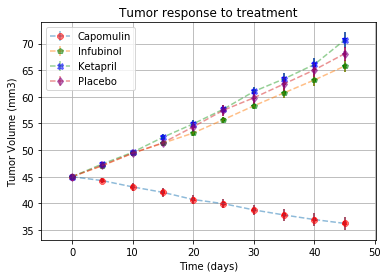

In [50]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure

ax=all_drugs_clean.plot(kind='scatter', x='Timepoint',y='Capomulin', linestyle=':', color='red', marker='8', yerr = Capomulin_sem);
ax.errorbar(x=all_drugs_clean['Timepoint'],y=all_drugs_clean['Capomulin'], yerr = Capomulin_sem, fmt='8', mfc='red', mec='red', ms=6, mew=1, linestyle='--',alpha=0.5, label="Capomulin" )

all_drugs_clean.plot(kind='scatter', x='Timepoint', y='Infubinol', linestyle=':', color='green', marker='p', yerr = Infubinol_sem, ax=ax);
ax.errorbar(x=all_drugs_clean['Timepoint'],y=all_drugs_clean['Infubinol'], yerr = Infubinol_sem, fmt='p', mfc='green', mec='green', ms=6, mew=1, linestyle='--', alpha=0.5, label="Infubinol")

all_drugs_clean.plot(kind='scatter', x='Timepoint', y='Ketapril', linestyle=':', color='blue', marker='X',  yerr = Ketapril_sem,  ax=ax);
ax.errorbar(x=merged_mets_clean['Timepoint'],y=all_drugs_clean['Ketapril'], yerr = Ketapril_sem, fmt='X', mfc='blue', mec='blue', ms=6, mew=1, linestyle='--', alpha=0.5, label="Ketapril")

all_drugs_clean.plot(kind='scatter', x='Timepoint', y='Placebo', linestyle=':', color='purple', marker='d',  yerr = Placebo_sem,  ax=ax);
ax.errorbar(x=all_drugs_clean['Timepoint'],y=all_drugs_clean['Placebo'], yerr = Placebo_sem, fmt='d', mfc='purple', mec='purple', ms=6, mew=1, linestyle='--', alpha=0.5, label="Placebo")

xlim = ax.get_xlim()
factor = 0.1 
new_xlim = (xlim[0] + xlim[1])/2 + np.array((-0.5, 0.5)) * (xlim[1] - xlim[0]) * (1 + factor) 
ax.set_xlim(new_xlim)
ax.grid()
ax.set_xlabel("Time (days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor response to treatment")
legend = ax.legend(loc='best', shadow=True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels )
plt.savefig("tumor_response_to_treatment.png")
plt.show()

## Metastatic Response to Treatment

In [16]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame

mets_response = clean_drugs_df.groupby(['Drug','Timepoint'])
mets_response_mean = pd.DataFrame(mets_response["Metastatic Sites"].mean())
mets_response_mean.reset_index(inplace=True)
mets_response_mean.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [17]:
Capomulin_mets = mets_response_mean.loc[mets_response_mean["Drug"]=="Capomulin",:]
Capomulin_mets
Capomulin_mets_renamed = Capomulin_mets.rename(columns={"Metastatic Sites":"Capomulin"})
Capomulin_mets_renamed.head()

Ketapril_mets = mets_response_mean.loc[mets_response_mean["Drug"]=="Ketapril",:]
Ketapril_mets
Ketapril_mets_renamed = Ketapril_mets.rename(columns={"Metastatic Sites":"Ketapril"})
Ketapril_mets_renamed.head()

Infubinol_mets = mets_response_mean.loc[mets_response_mean["Drug"]=="Infubinol",:]
Infubinol_mets
Infubinol_mets_renamed = Infubinol_mets.rename(columns={"Metastatic Sites":"Infubinol"})
Infubinol_mets_renamed.head()

Placebo_mets = mets_response_mean.loc[mets_response_mean["Drug"]=="Placebo",:]
Placebo_mets
Placebo_mets_renamed = Placebo_mets.rename(columns={"Metastatic Sites":"Placebo"})
Placebo_mets_renamed.head()

,Drug,Timepoint,Placebo
30,Placebo,0,0.000000
31,Placebo,5,0.375000
32,Placebo,10,0.833333
33,Placebo,15,1.250000
34,Placebo,20,1.526316


In [18]:
merge3 = pd.merge(Capomulin_mets_renamed, Ketapril_mets_renamed, on = "Timepoint")
#merge3.head()

merge4 = pd.merge(Infubinol_mets_renamed, Placebo_mets_renamed, on = "Timepoint")
#merge4.head()

merged_mets = pd.merge(merge3, merge4, on = "Timepoint")
#merged_mets.head()

merged_mets_clean = merged_mets[["Timepoint", "Capomulin", "Ketapril", "Infubinol", "Placebo"]]
merged_mets_clean.head()




,Timepoint,Capomulin,Ketapril,Infubinol,Placebo
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.304348,0.280000,0.375000
2,10,0.320000,0.590909,0.666667,0.833333
3,15,0.375000,0.842105,0.904762,1.250000
4,20,0.652174,1.210526,1.050000,1.526316


In [19]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame
mets_response_sem = pd.DataFrame(mets_response["Metastatic Sites"].sem())
#mets_response_sem.reset_index(inplace=True)
mets_response_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [20]:
Capomulin_mets_sem = mets_response_sem.loc["Capomulin",["Metastatic Sites"]]
Capomulin_mets_sem = Capomulin_mets_sem.iloc[:, 0].values
Capomulin_mets_sem

Ketapril_mets_sem = mets_response_sem.loc["Ketapril",["Metastatic Sites"]]
Ketapril_mets_sem = Ketapril_mets_sem.iloc[:, 0].values
Ketapril_mets_sem

Infubinol_mets_sem = mets_response_sem.loc["Infubinol",["Metastatic Sites"]]
Infubinol_mets_sem = Infubinol_mets_sem.iloc[:, 0].values
Infubinol_mets_sem

Placebo_mets_sem = mets_response_sem.loc["Placebo",["Metastatic Sites"]]
Placebo_mets_sem = Placebo_mets_sem.iloc[:, 0].values
Placebo_mets_sem


array([0.        , 0.10094661, 0.11526068, 0.19022148, 0.23406428,
       0.26388762, 0.30026443, 0.34141179, 0.2972942 , 0.30424001])

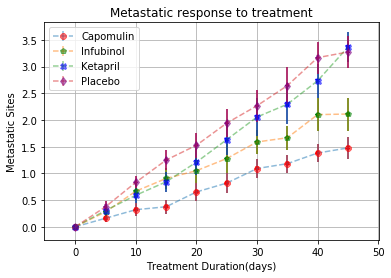

In [48]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure

ax=merged_mets_clean.plot(kind='scatter', x='Timepoint',y='Capomulin', linestyle=':', color='red', marker='8', yerr = Capomulin_mets_sem);
ax.errorbar(x=merged_mets_clean['Timepoint'],y=merged_mets_clean['Capomulin'], yerr = Capomulin_mets_sem, fmt='8', mfc='red', mec='red', ms=6, mew=1, linestyle='--',alpha=0.5, label="Capomulin" )

merged_mets_clean.plot(kind='scatter', x='Timepoint', y='Infubinol', linestyle=':', color='green', marker='p', yerr = Infubinol_mets_sem, ax=ax);
ax.errorbar(x=merged_mets_clean['Timepoint'],y=merged_mets_clean['Infubinol'], yerr = Infubinol_mets_sem, fmt='p', mfc='green', mec='green', ms=6, mew=1, linestyle='--', alpha=0.5, label="Infubinol")

merged_mets_clean.plot(kind='scatter', x='Timepoint', y='Ketapril', linestyle=':', color='blue', marker='X',  yerr = Ketapril_mets_sem,  ax=ax);
ax.errorbar(x=merged_mets_clean['Timepoint'],y=merged_mets_clean['Ketapril'], yerr = Ketapril_mets_sem, fmt='X', mfc='blue', mec='blue', ms=6, mew=1, linestyle='--', alpha=0.5, label="Ketapril")

merged_mets_clean.plot(kind='scatter', x='Timepoint', y='Placebo', linestyle=':', color='purple', marker='d',  yerr = Placebo_mets_sem,  ax=ax);
ax.errorbar(x=merged_mets_clean['Timepoint'],y=merged_mets_clean['Placebo'], yerr = Placebo_mets_sem, fmt='d', mfc='purple', mec='purple', ms=6, mew=1, linestyle='--', alpha=0.5, label="Placebo")

xlim = ax.get_xlim()
factor = 0.1 
new_xlim = (xlim[0] + xlim[1])/2 + np.array((-0.5, 0.5)) * (xlim[1] - xlim[0]) * (1 + factor) 
ax.set_xlim(new_xlim)
ax.grid()
ax.set_xlabel("Treatment Duration(days)")
ax.set_ylabel("Metastatic Sites")
ax.set_title("Metastatic response to treatment")
legend = ax.legend(loc='best', shadow=True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels )
plt.savefig("mets_response_to_treatment.png")
plt.show()


## Survival Rates

In [22]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame

mice_count=pd.DataFrame(tumor_response["Mouse ID"].count())
mice_count.reset_index(inplace=True)
mice_count.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [23]:
Capomulin_mice = mice_count.loc[mice_count["Drug"]=="Capomulin",:]
Capomulin_mice
Capomulin_mice_rename = Capomulin_mice.rename(columns={"Mouse ID":"Capomulin"})
Capomulin_mice_rename.head()

Ketapril_mice = mice_count.loc[mice_count["Drug"]=="Ketapril",:]
Ketapril_mice
Ketapril_mice_rename = Ketapril_mice.rename(columns={"Mouse ID":"Ketapril"})
Ketapril_mice_rename.head()

Infubinol_mice = mice_count.loc[mice_count["Drug"]=="Infubinol",:]
Infubinol_mice
Infubinol_mice_rename = Infubinol_mice.rename(columns={"Mouse ID":"Infubinol"})
Infubinol_mice_rename.head()

Placebo_mice = mice_count.loc[mice_count["Drug"]=="Placebo",:]
Placebo_mice
Placebo_mice_rename = Placebo_mice.rename(columns={"Mouse ID":"Placebo"})
Placebo_mice_rename.head()

,Drug,Timepoint,Placebo
30,Placebo,0,25
31,Placebo,5,24
32,Placebo,10,24
33,Placebo,15,20
34,Placebo,20,19


In [24]:
merge5 = pd.merge(Capomulin_mice_rename, Ketapril_mice_rename, on = "Timepoint")
merge5

merge6 = pd.merge(Infubinol_mice_rename, Placebo_mice_rename, on = "Timepoint")
merge6

mice_merge = pd.merge(merge5, merge6, on = "Timepoint")
mice_merge_clean = mice_merge[["Timepoint", "Capomulin", "Ketapril", "Infubinol", "Placebo"]]
mice_merge_clean.head()


,Timepoint,Capomulin,Ketapril,Infubinol,Placebo
0,0,25,25,25,25
1,5,25,23,25,24
2,10,25,22,21,24
3,15,24,19,21,20
4,20,23,19,20,19


In [25]:
mice_merge_clean = mice_merge_clean.astype(float)
mice_merge_clean.dtypes

Timepoint    float64
Capomulin    float64
Ketapril     float64
Infubinol    float64
Placebo      float64
dtype: object

In [26]:
mice_merge_clean["Capomulin%"]=mice_merge_clean["Capomulin"]/mice_merge_clean["Capomulin"].iloc[0] * 100
mice_merge_clean["Ketapril%"]=mice_merge_clean["Ketapril"]/mice_merge_clean["Ketapril"].iloc[0] * 100
mice_merge_clean["Infubinol%"]=mice_merge_clean["Infubinol"]/mice_merge_clean["Infubinol"].iloc[0] * 100
mice_merge_clean["Placebo%"]=mice_merge_clean["Placebo"]/mice_merge_clean["Placebo"].iloc[0] * 100
mice_merge_clean

,Timepoint,Capomulin,Ketapril,Infubinol,Placebo,Capomulin%,Ketapril%,Infubinol%,Placebo%
0,0.0,25.0,25.0,25.0,25.0,100.0,100.0,100.0,100.0
1,5.0,25.0,23.0,25.0,24.0,100.0,92.0,100.0,96.0
2,10.0,25.0,22.0,21.0,24.0,100.0,88.0,84.0,96.0
3,15.0,24.0,19.0,21.0,20.0,96.0,76.0,84.0,80.0
4,20.0,23.0,19.0,20.0,19.0,92.0,76.0,80.0,76.0
5,25.0,22.0,19.0,18.0,17.0,88.0,76.0,72.0,68.0
6,30.0,22.0,18.0,17.0,15.0,88.0,72.0,68.0,60.0
7,35.0,22.0,17.0,12.0,14.0,88.0,68.0,48.0,56.0
8,40.0,21.0,15.0,10.0,12.0,84.0,60.0,40.0,48.0
9,45.0,21.0,11.0,9.0,11.0,84.0,44.0,36.0,44.0


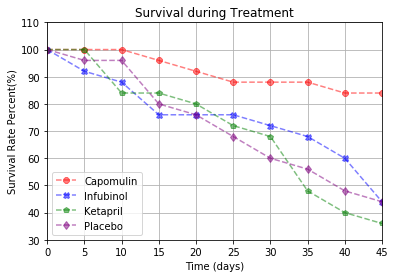

In [49]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
ax=mice_merge_clean.plot(kind='line', x='Timepoint',y='Capomulin%', linestyle='--', color='red', marker='8', alpha=0.5, label="Capomulin");
mice_merge_clean.plot(kind='line', x='Timepoint', y='Ketapril%', linestyle='--', color='blue', marker='X', ax=ax, alpha=0.5, label="Infubinol");
mice_merge_clean.plot(kind='line', x='Timepoint', y='Infubinol%', linestyle='--', color='green', marker='p',  ax=ax,  alpha=0.5, label="Ketapril");
mice_merge_clean.plot(kind='line', x='Timepoint', y='Placebo%', linestyle='--', color='purple', marker='d', ax=ax,  alpha=0.5, label="Placebo");

ax.set_xlim(0, 45, 5)
ax.set_ylim(30, 110)
ax.grid()
ax.set_xlabel("Time (days)")
ax.set_ylabel("Survival Rate Percent(%)")
ax.set_title("Survival during Treatment")
legend = ax.legend(loc='best', shadow=True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels )
plt.savefig("Survival_during_treatment.png")
plt.show()

## Summary Bar Graph

In [28]:
# Calculate the percent changes for each drug

# Display the data to confirm
Capomulin_percent_change = (all_drugs_clean["Capomulin"].iloc[9]-all_drugs_clean["Capomulin"].iloc[0])/all_drugs_clean[
    "Capomulin"].iloc[0] * 100
#Capomulin_percent_change

Ketapril_percent_change = (all_drugs_clean["Ketapril"].iloc[9]-all_drugs_clean["Ketapril"].iloc[0])/all_drugs_clean[
    "Ketapril"].iloc[0] * 100
#Ketapril_percent_change

Infubinol_percent_change = (all_drugs_clean["Infubinol"].iloc[9]-all_drugs_clean["Infubinol"].iloc[0])/all_drugs_clean[
    "Infubinol"].iloc[0] * 100
#Infubinol_percent_change

Placebo_percent_change = (all_drugs_clean["Placebo"].iloc[9]-all_drugs_clean["Placebo"].iloc[0])/all_drugs_clean[
    "Placebo"].iloc[0] * 100
#Placebo_percent_change

In [29]:

t = {'Capomulin': Capomulin_percent_change, 'Infubinol': Infubinol_percent_change, 'Ketapril': Ketapril_percent_change, 'Placebo': Placebo_percent_change}
total_change = pd.Series(t)
total_change

Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

In [30]:
therapy=total_change.keys()
therapy

Index(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], dtype='object')

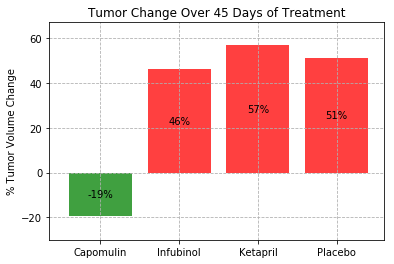

In [31]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
ax = plt.subplot()
x_axis = np.arange(0, len(therapy))
tick_locations = []
for x in x_axis:
    tick_locations.append(x + 0.4)

plt.title("Tumor Change Over 45 Days of Treatment")
plt.ylabel("% Tumor Volume Change")

plt.xlim(-0.25, len(therapy))
plt.ylim(-30, max(total_change) + 10)
plt.grid(True, linestyle='dashed')

plt.xticks(tick_locations, therapy)

width = 0.4
vals = [1,2,3,4,5]
colors = ['r','b','b','b','b']
colors = []
for value in total_change:
    if value >= 0 :
        colors.append('r')
    else:
        colors.append('g')
percents=ax.bar(x_axis, total_change, color=colors, alpha=0.75, align="edge")
def autolabel(percents, ax):

    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    for percent in percents:
        height = percent.get_height()
       
        ax.text(percent.get_x()+ percent.get_width()/2., 0.5*height, '%d' % int(height) +"%", ha='center', va='center')

autolabel(percents, ax)

plt.savefig("TumorChange_Over_45_Days_Treatment.png")
plt.show()

In [ ]:
#Pymeceutical Analysis

#The metastatic response to treatment for Capomulin was significantly better when compared to the placebo, Infubinol, and Ketapril.  
#Over a 45 day period, tumor volume for mice that were administered Capomulin was reduced from ~45mm3 to ~36mm3. 
#The tumor volume for the other therapies and placebo significantly increased to >65mm3.
#Although the number of metastatic sites increased with all therapies and placebo, the total of metastatic sites for Capomulin
# was half the amount compared to the placebo and other therapies (~1.5 vs ~3).
#Overall survival (OS) was nearly 85% at 45 days for mice on Capomulin. For the other two therapies and placebo, OS was 45% or less.
#Ketapril was lower than the placebo for OS. 
#More analysis is needed to determine if Capomulin is the superior therapy because side effects and quality of life were not 
# taken into consideration during this study. 